In [18]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv("credit_risk_dataset.csv")

print(data.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [ ]:
# Calculating the amount of unusable data in the dataset

print("Column Names:", data.columns.tolist())  
nan_percentage = data.isnull().sum() * 100 / len(data)  
print("Percentage of NaN Data in Each Column:\n", nan_percentage)
#the amount of unusable data is negligible so ignore

Column Names: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
Percentage of NaN Data in Each Column:
 person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [6]:
data.nunique()


person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


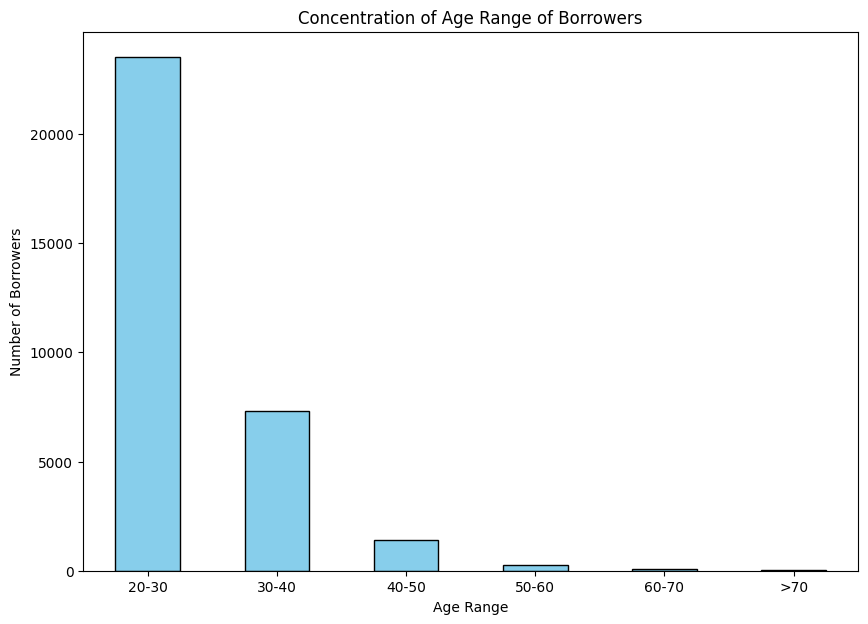

In [20]:
#Concentration of age of borrowers
bins = [20, 30, 40, 50, 60, 70, 100] 
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '>70'] 
# Create a new column for the age range 
data['age_range'] = pd.cut(data['person_age'], bins=bins, labels=labels, right=False) 
# Count the number of borrowers in each age range 
age_range_counts = data['age_range'].value_counts().sort_index() 
# Create a bar graph 
plt.figure(figsize=(10, 7)) 
age_range_counts.plot(kind='bar', color='skyblue', edgecolor='black') 
plt.xlabel('Age Range') 
plt.ylabel('Number of Borrowers') 
plt.title('Concentration of Age Range of Borrowers') 
# Show the plot
plt.xticks(rotation=0) 
plt.show()

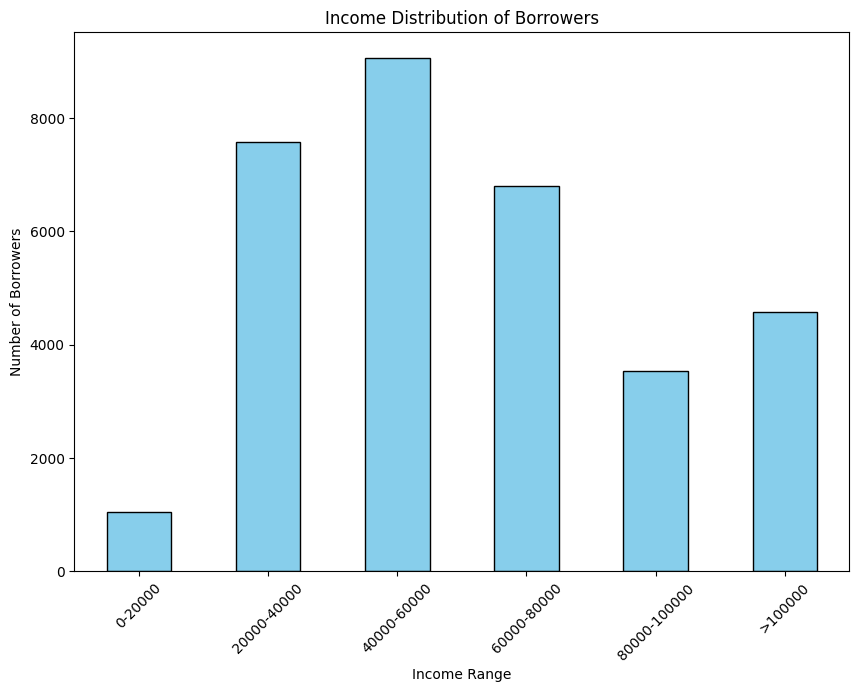

In [21]:
#Concentration based on income range of borrowers
bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '>100000'] 

data['income_range'] = pd.cut(data['person_income'], bins=bins, labels=labels, right=False)

income_range_counts = data['income_range'].value_counts().sort_index() 
# Create a bar graph 
plt.figure(figsize=(10, 7)) 
income_range_counts.plot(kind='bar', color='skyblue', edgecolor='black') 
plt.xlabel('Income Range') 
plt.ylabel('Number of Borrowers') 
plt.title('Income Distribution of Borrowers') 
 
plt.xticks(rotation=45) 
plt.show()

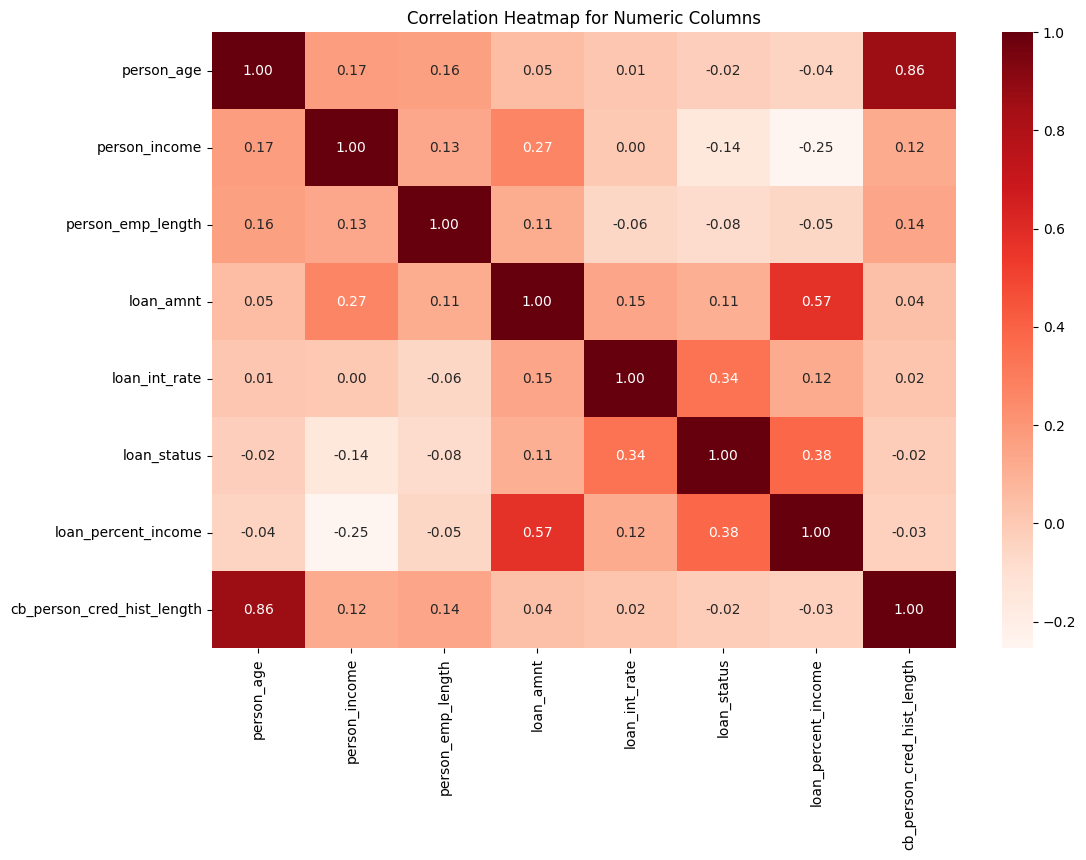

In [13]:

correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
# Create a heatmap 
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f') 
# Add title 
plt.title("Correlation Heatmap for Numeric Columns") 
# Show the plot 
plt.show()